In [1]:
import pandas as pd
import numpy as np
import sympy
import datetime as dt
import time
from math import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from ipyleaflet import *
import folium
import json
import geopy.distance
from haversine import haversine
from tqdm import tqdm_notebook

sns.set()
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

import platform
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    
    
import scipy as sp
import statsmodels.api as sm # statsmodel 기본 import
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms 
import sklearn as sk

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

import warnings
warnings.filterwarnings("ignore")

/Users/sunwoongkim/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from patsy import dmatrix

In [3]:
train = pd.read_csv("../dataset/train.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [6]:
pickup_datetime_dt = pd.to_datetime(train["pickup_datetime"])
dropoff_datetime_dt = pd.to_datetime(train["dropoff_datetime"])

train["pickup_datetime"] = pickup_datetime_dt
train["dropoff_datetime"] = dropoff_datetime_dt

train["pickup_date"] = train["pickup_datetime"].dt.date
train["dropoff_date"] = train["dropoff_datetime"].dt.date

train["pickup_month"] = train["pickup_datetime"].dt.month
train["dropoff_month"] = train["dropoff_datetime"].dt.month

train["pickup_weekday"] = train["pickup_datetime"].dt.weekday
train["dropoff_weekday"] = train["dropoff_datetime"].dt.weekday

train["pickup_hour"] = train["pickup_datetime"].dt.hour
train["dropoff_hour"] = train["dropoff_datetime"].dt.hour

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 19 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
pickup_date           1458644 non-null object
dropoff_date          1458644 non-null object
pickup_month          1458644 non-null int64
dropoff_month         1458644 non-null int64
pickup_weekday        1458644 non-null int64
dropoff_weekday       1458644 non-null int64
pickup_hour           1458644 non-null int64
dropoff_hour          1458644 non-null int64
dt

In [8]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,dropoff_month,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,3.516818e+00,3.517178e+00,3.050375e+00,3.054422e+00,1.360648e+01,1.359890e+01
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,1.681038e+00,1.681217e+00,1.954039e+00,1.956599e+00,6.399693e+00,6.483682e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00,9.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,1.400000e+01,1.400000e+01
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,1.900000e+01,1.900000e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,6.000000e+00,7.000000e+00,6.000000e+00,6.000000e+00,2.300000e+01,2.300000e+01


In [9]:
real = ["passenger_count", "pickup_longitude", 
        "pickup_latitude", "dropoff_longitude", "dropoff_latitude"]
cat = [elem for elem in train.columns if elem not in real]
cat.remove("trip_duration")
cat

['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'store_and_fwd_flag',
 'pickup_date',
 'dropoff_date',
 'pickup_month',
 'dropoff_month',
 'pickup_weekday',
 'dropoff_weekday',
 'pickup_hour',
 'dropoff_hour']

In [10]:
len(train.columns), len(real), len(cat)

(19, 5, 13)

In [11]:
train_real = train[real]

In [12]:
train_real_sample = train_real.sample(10000)
train_real_sample.describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.650600,-73.973623,40.750851,-73.973369,40.751539
std,1.300188,0.037835,0.027976,0.035163,0.031750
min,0.000000,-74.036530,40.576576,-74.187714,40.575310
25%,1.000000,-73.991877,40.737254,-73.991470,40.735912
50%,1.000000,-73.981888,40.753901,-73.979870,40.754293
75%,2.000000,-73.967855,40.767904,-73.963318,40.768921
max,6.000000,-73.705574,40.896053,-73.524658,41.054565


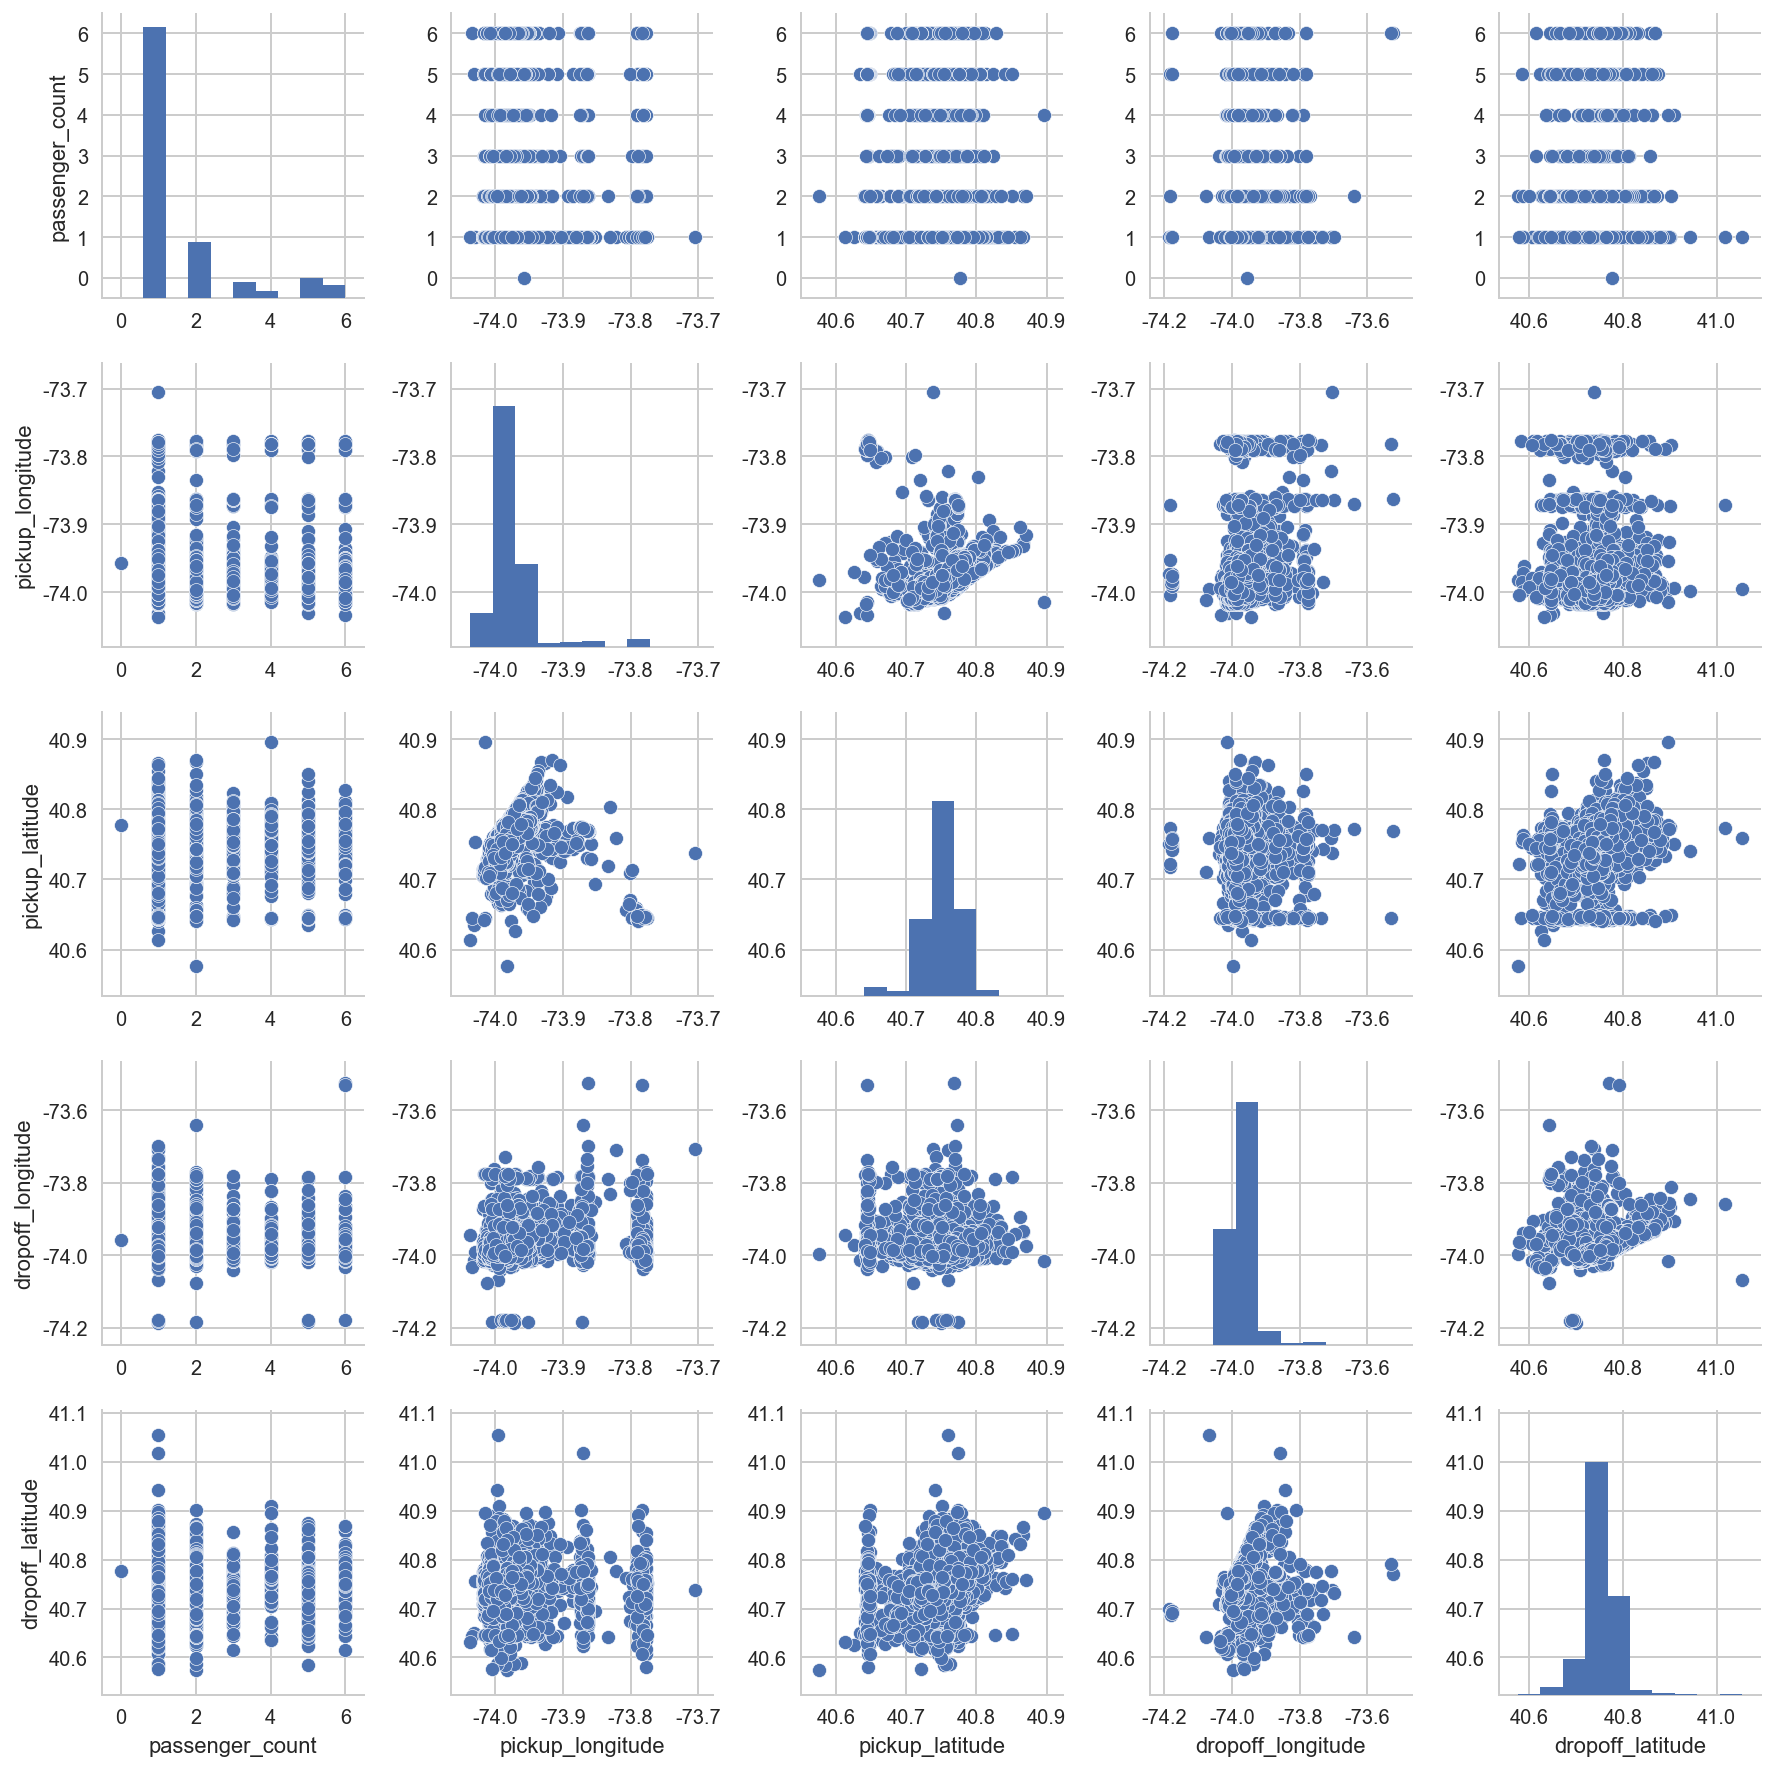

In [13]:
sns.pairplot(train_real_sample)
plt.show()

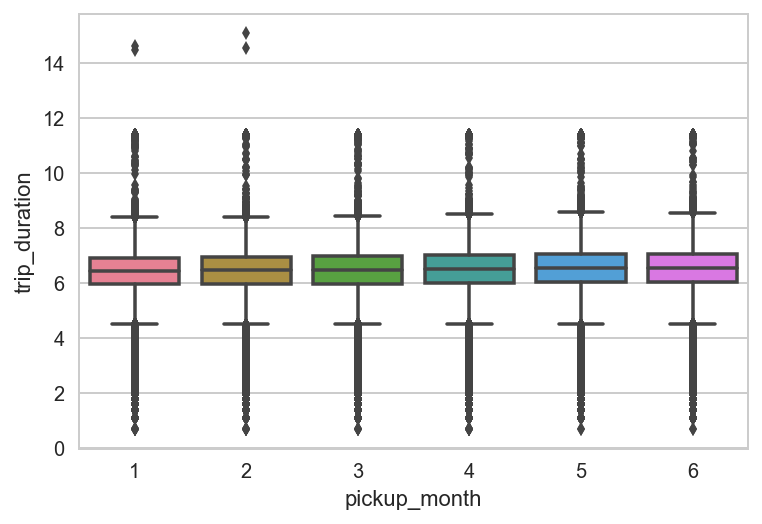

In [14]:
sns.boxplot(x="pickup_month", y=np.log1p(train["trip_duration"]),
            data=train, palette="husl")
plt.show()

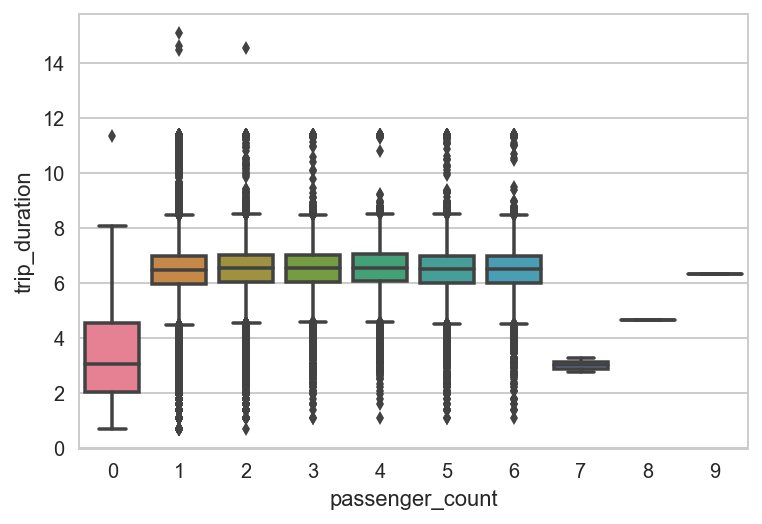

In [15]:
sns.boxplot(x="passenger_count", y=np.log1p(train["trip_duration"]), 
            data=train, palette="husl")
plt.show()

In [16]:
model = sm.OLS.from_formula("trip_duration ~ passenger_count", train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     104.7
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.44e-24
Time:                        21:39:39   Log-Likelihood:            -1.4561e+07
No. Observations:             1458644   AIC:                         2.912e+07
Df Residuals:                 1458642   BIC:                         2.912e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         903.3010      6.998    1

In [17]:
pickup_lat = tuple(train["pickup_latitude"])
pickup_lng = tuple(train["pickup_longitude"])
dropoff_lat = tuple(train["dropoff_latitude"])
dropoff_lng = tuple(train["dropoff_longitude"])

In [18]:
pickup_loc = tuple(zip(pickup_lat, pickup_lng))
dropoff_loc = tuple(zip(dropoff_lat, dropoff_lng))

In [19]:
len(pickup_loc), len(dropoff_loc)

(1458644, 1458644)

In [20]:
distance = []
for i in range(len(pickup_loc)):
    distance.append(haversine(pickup_loc[i], dropoff_loc[i]))

In [21]:
train["distance"] = distance

In [22]:
len(distance)

1458644

In [23]:
model = sm.OLS.from_formula("trip_duration ~ distance", train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                 1.322e+04
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:40:07   Log-Likelihood:            -1.4554e+07
No. Observations:             1458644   AIC:                         2.911e+07
Df Residuals:                 1458642   BIC:                         2.911e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    561.9630      5.531    101.607      0.0

In [25]:
# fig = sm.graphics.plot_regress_exog(result, "distance")
# fig.set_size_inches(8, 5)
# fig.suptitle("")
# fig.tight_layout()
# plt.show()

In [26]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

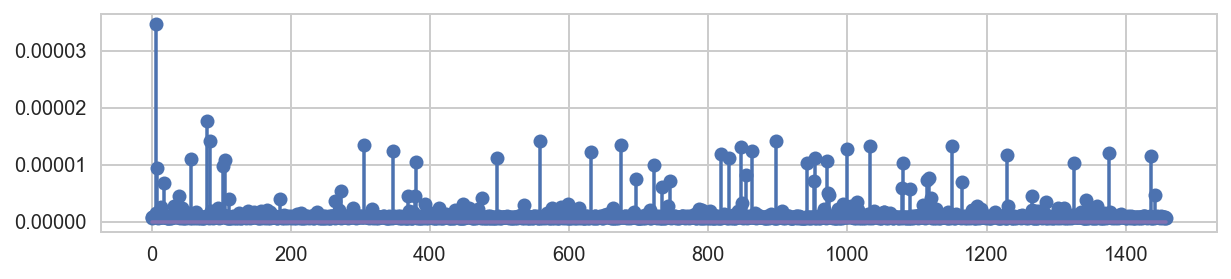

In [27]:
plt.figure(figsize=(10, 2))
plt.stem(hat[::1000])
plt.show()

In [28]:
# trip_duration에 로그를 취했을 때는 skewness가 감소, 좀 더 정규성을 이루게 됨 (R-squared 0.009 --> 0.329)

model = sm.OLS.from_formula("np.log1p(trip_duration) ~ distance", train)
result = model.fit()
print(result.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.329
Model:                                 OLS   Adj. R-squared:                  0.329
Method:                      Least Squares   F-statistic:                 7.152e+05
Date:                     Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                             21:41:06   Log-Likelihood:            -1.4455e+06
No. Observations:                  1458644   AIC:                         2.891e+06
Df Residuals:                      1458642   BIC:                         2.891e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

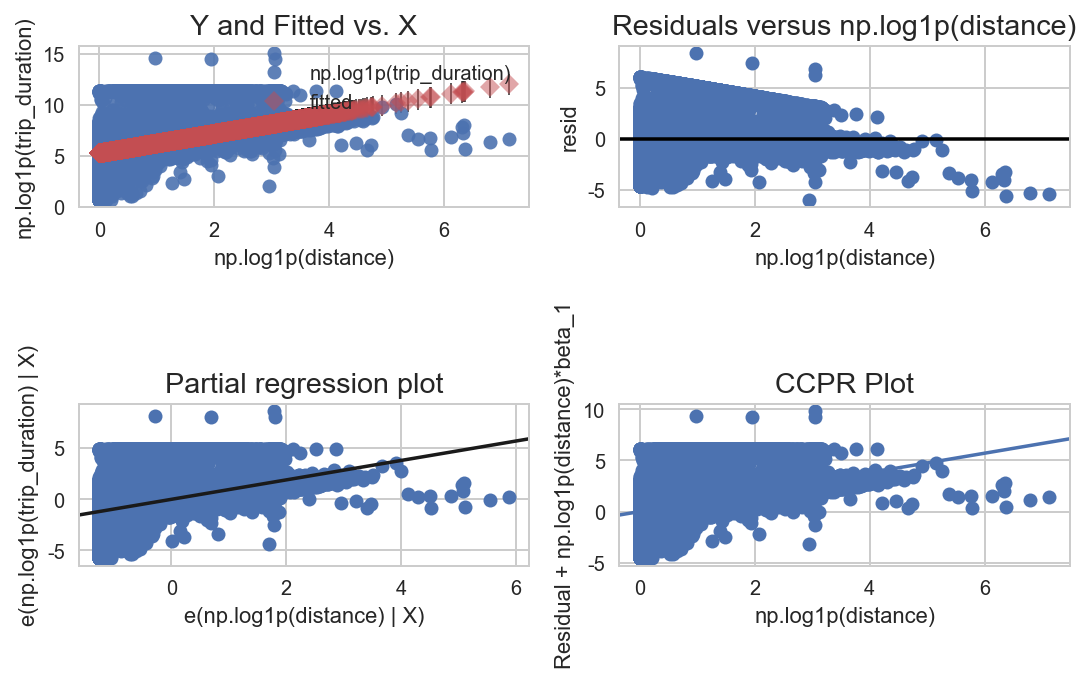

In [37]:
# fig = sm.graphics.plot_regress_exog(result, "np.log1p(distance)")
# fig.set_size_inches(8, 5)
# fig.suptitle("")
# fig.tight_layout()
# plt.show()

In [29]:
# 평균 시속 구하기

train["avg_speed_h"] = 1000 * train["distance"] / train["trip_duration"]

In [30]:
train["avg_speed_h"].describe()

count    1.458644e+06
mean     4.006447e+00
std      4.160423e+00
min      0.000000e+00
25%      2.533687e+00
50%      3.553327e+00
75%      4.956920e+00
max      2.576344e+03
Name: avg_speed_h, dtype: float64

In [59]:
train_speed_duration = train[["trip_duration", "avg_speed_h"]]
train_speed_duration.tail()

,trip_duration,avg_speed_h
1458639,778,1.574653
1458640,655,9.236390
1458641,764,10.241631
1458642,373,2.929126
1458643,198,5.727485


In [60]:
# 평균 시속과 trip_duration을 각각 정규화한 뒤, pickup_hour로 groupby.mean()

mean_duration = train_speed_duration["trip_duration"].mean()
std_duration = train_speed_duration["trip_duration"].std()

mean_speed = train_speed_duration["avg_speed_h"].mean()
std_speed = train_speed_duration["avg_speed_h"].std()

train_sp_du_normalized = pd.DataFrame()

train_sp_du_normalized["trip_duration"] = (train_speed_duration["trip_duration"] - mean_duration) / std_duration
train_sp_du_normalized["avg_speed_h"] = (train_speed_duration["avg_speed_h"] - mean_speed) / std_speed
train_sp_du_normalized["pickup_hour"] = train["pickup_hour"]

train_sp_du_norm_groupby = train_sp_du_normalized.groupby("pickup_hour").mean()
train_sp_du_norm_groupby.tail()

,trip_duration,avg_speed_h
pickup_hour,,
19,-0.012437,-0.056432
20,-0.015281,0.062490
21,-0.013169,0.091267
22,0.012213,0.103436
23,-0.006568,0.162511


In [67]:
len(train_sp_du_normalized["trip_duration"])

1458644

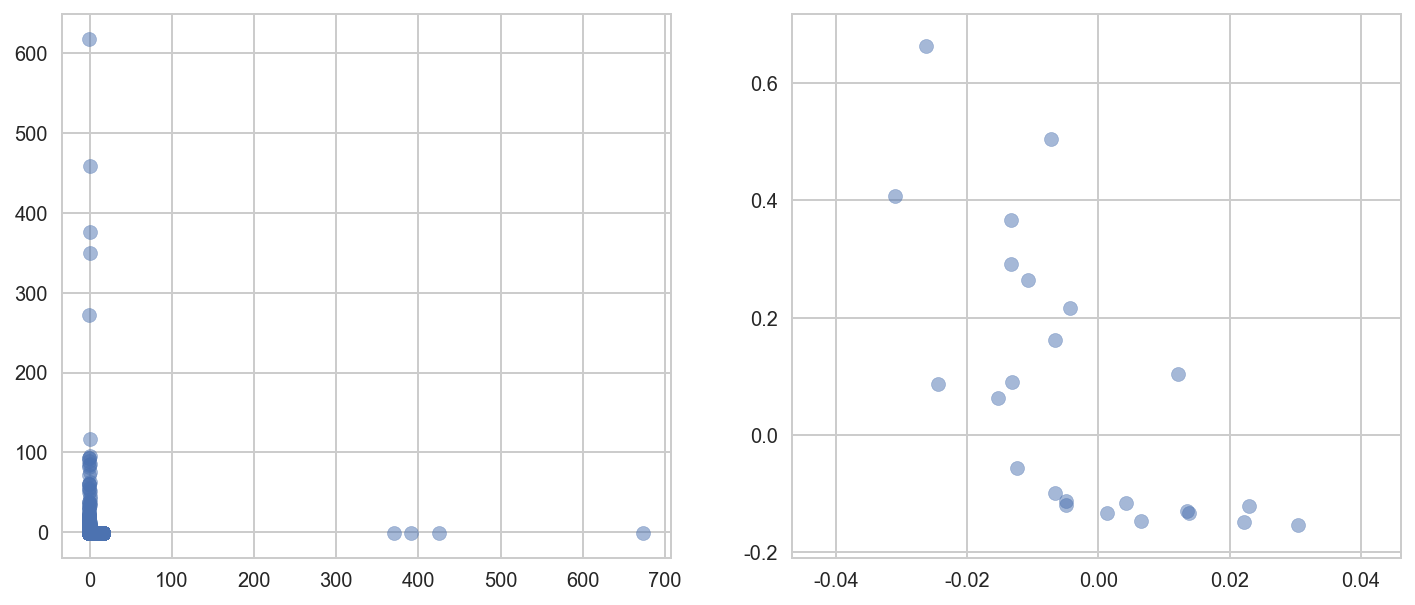

In [69]:
# groupby를 진행한 뒤를 살펴보면 speed가 증가할수록 trip_duration은 낮아짐을 보임
# groupby 전 데이터에는 여전히 아웃라이어가 많아 많은 영향을 받고 있음

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(x="trip_duration", 
            y="avg_speed_h", data=train_sp_du_normalized, alpha=.5)

plt.subplot(122)
plt.scatter(x="trip_duration", 
            y="avg_speed_h", data=train_sp_du_norm_groupby, alpha=.5)

plt.show()


plt.show()

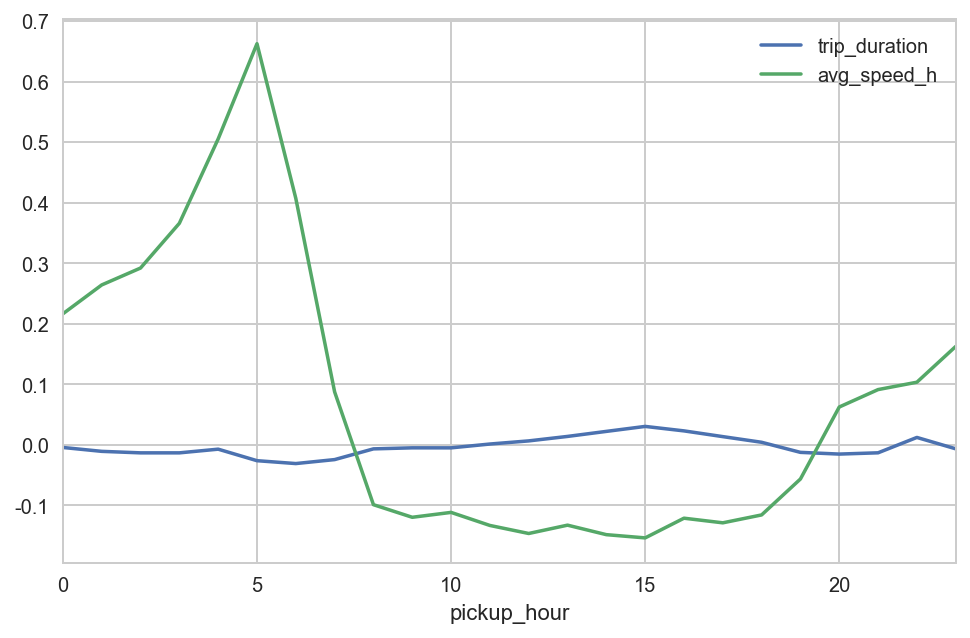

In [71]:
# 선 그래프로 보면 상관관계가 더 명확히 보임

train_sp_du_norm_groupby.plot(figsize=(8, 5))
plt.show()

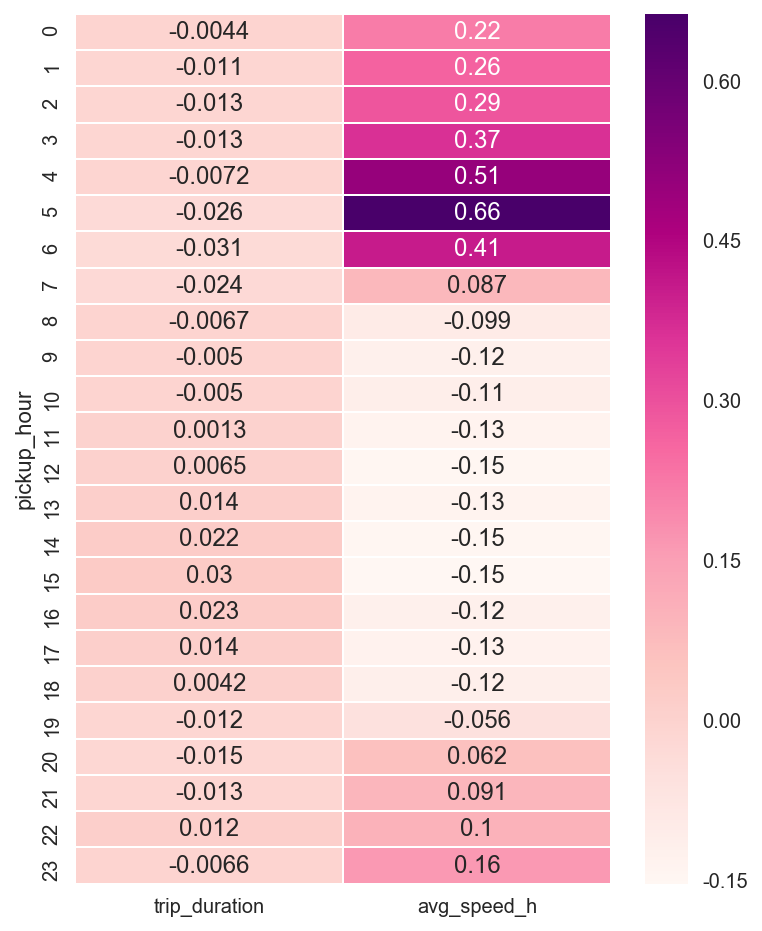

In [74]:
# heatmap으로 살펴보면 speed는 새벽에 가장 높으며, 출근시간부터 퇴근시간까지 계속해서 낮은 모습을 보임
# 이 기간엔 trip_duration도 상대적으로 조금 높아지는 모습을 보임

plt.figure(figsize=(6, 8))
sns.heatmap(train_sp_du_norm_groupby, cmap="RdPu", annot=True, linewidths=.5)
plt.show()

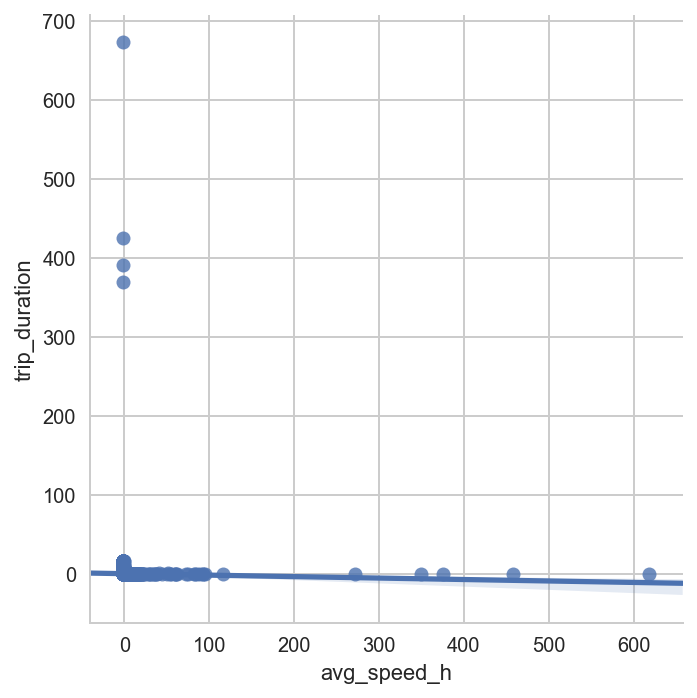

In [75]:
# 아웃라이어가 많음

plt.figure(figsize=(7, 5))
sns.lmplot(x="avg_speed_h", y="trip_duration", data=train_sp_du_normalized)
plt.show()

In [76]:
# trip_duration 정규화 값이 300 넘는 데이터 4개 식별

train_sp_du_normalized[train_sp_du_normalized["trip_duration"] > 300]

,trip_duration,avg_speed_h,pickup_hour
355003,370.176951,-0.960493,0
680594,391.149444,-0.962289,22
924150,425.142059,-0.962814,6
978383,673.101377,-0.961634,22


In [94]:
idx = np.where(train_sp_du_normalized["trip_duration"] > 300)
idx

(array([355003, 680594, 924150, 978383]),)

In [100]:
# trip_duration 정규화 값이 300 넘는 데이터 4개 제거

print(len(train_sp_du_normalized))
train_sp_du_normalized.drop(idx, inplace=True)
print(len(train_sp_du_normalized))

1458644
1458640


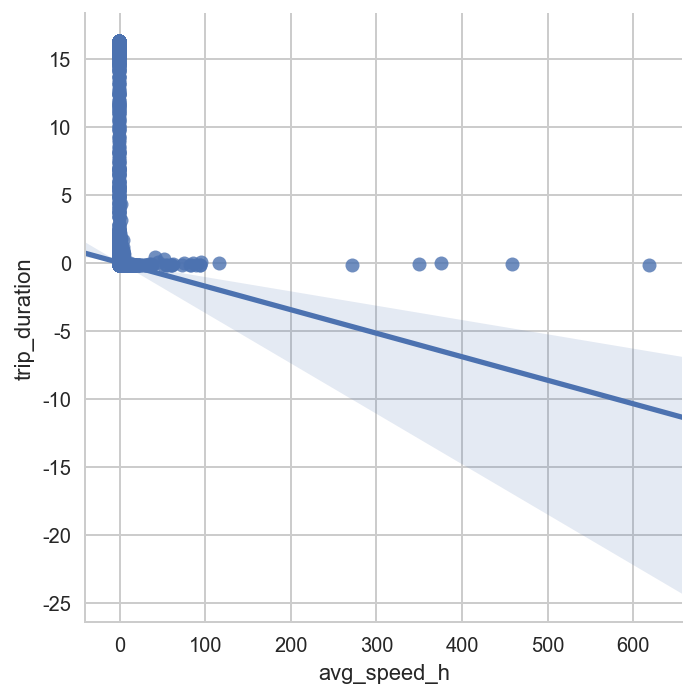

In [120]:
# 제거 후 lmplot: 여전히 분포는 예쁘지 않음

plt.figure(figsize=(7, 5))
sns.lmplot(x="avg_speed_h", y="trip_duration", data=train_sp_du_normalized)
plt.show()

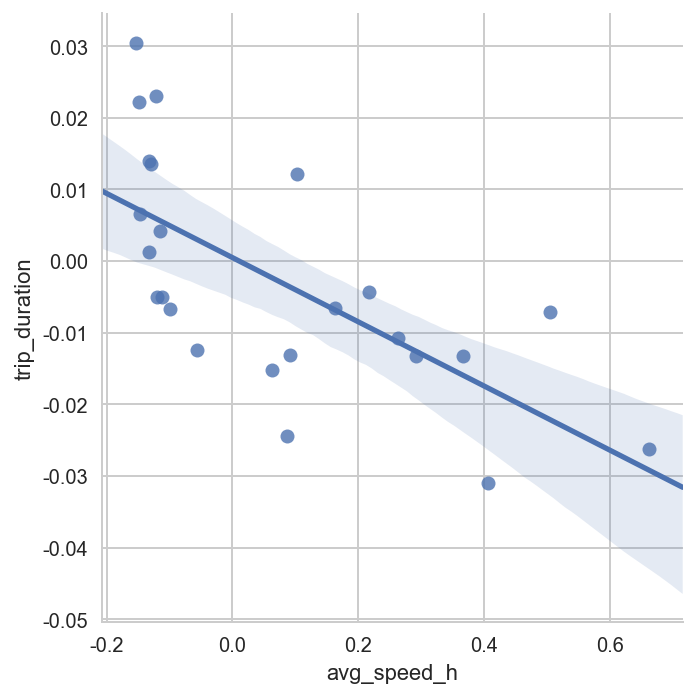

In [102]:
# groupby lmplot: 음의 상관관계를 보임

plt.figure(figsize=(7, 5))
sns.lmplot(x="avg_speed_h", y="trip_duration", data=train_sp_du_norm_groupby)
plt.show()

In [103]:
model = sm.OLS.from_formula("trip_duration ~ avg_speed_h", train_sp_du_normalized)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1189.
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          1.75e-260
Time:                        22:15:49   Log-Likelihood:            -1.3374e+06
No. Observations:             1458640   AIC:                         2.675e+06
Df Residuals:                 1458638   BIC:                         2.675e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0013      0.001     -2.544      

In [104]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

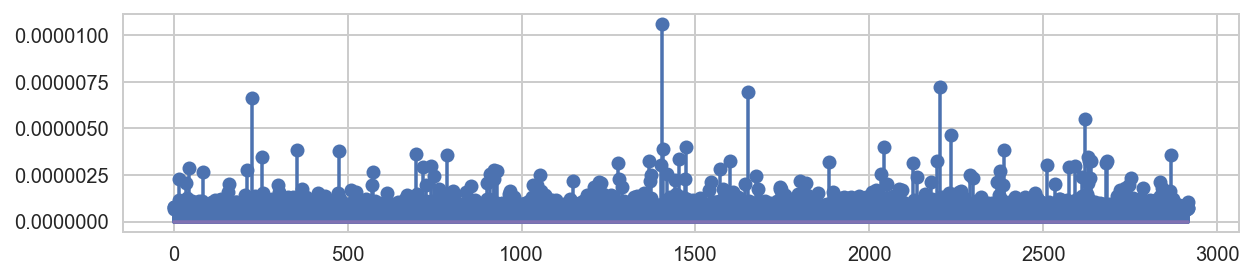

In [107]:
# 500개 간격으로 아웃라이어 살펴보기

plt.figure(figsize=(10, 2))
plt.stem(hat[::500])
plt.show()

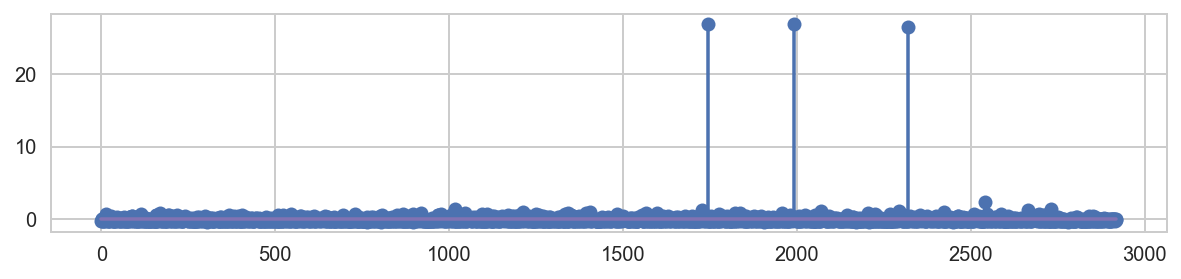

In [119]:
# 명백한 아웃라이어 3개 발견

plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson[::500])
plt.show()

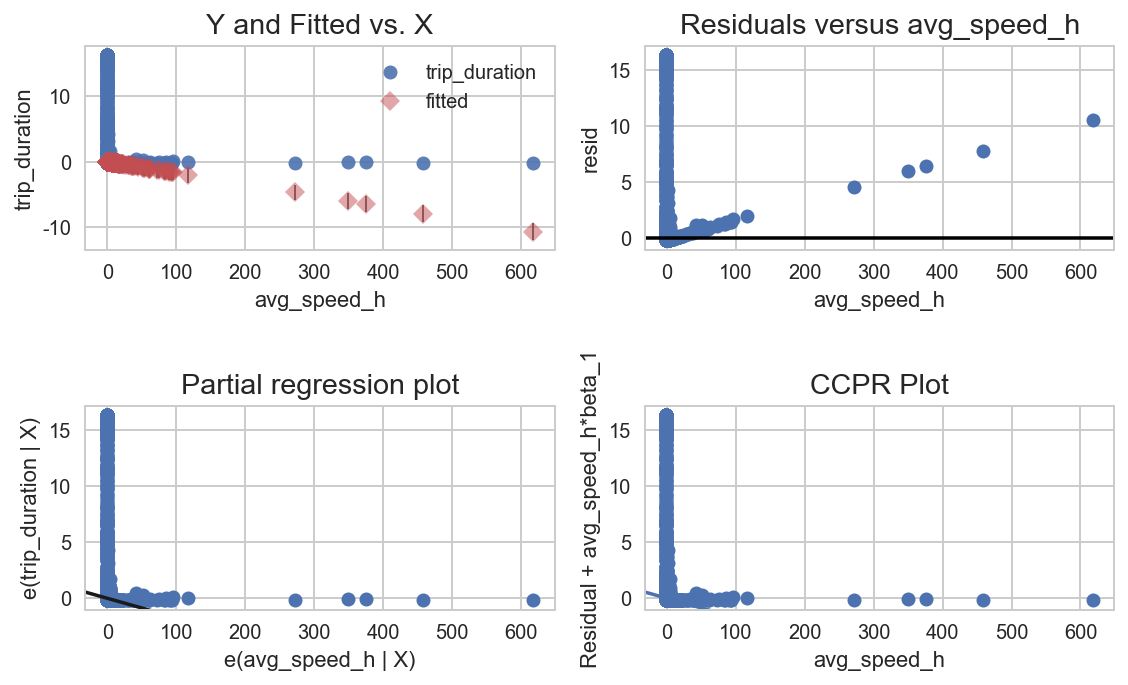

In [108]:
fig = sm.graphics.plot_regress_exog(result, "avg_speed_h")
fig.set_size_inches(8, 5)
fig.suptitle("")
fig.tight_layout()
plt.show()

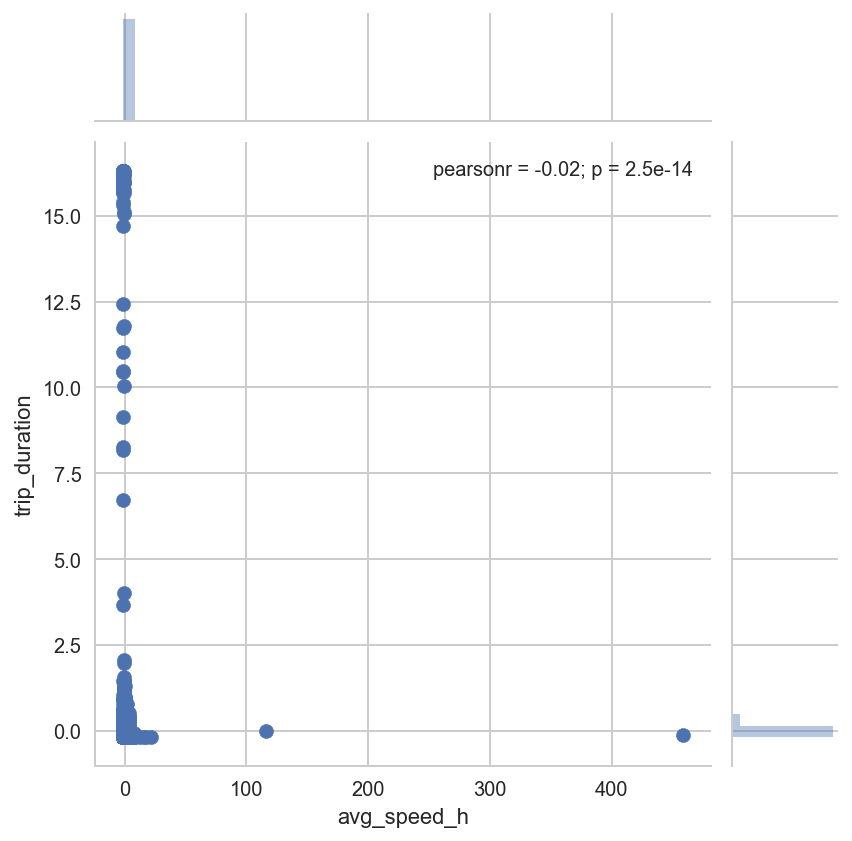

In [115]:
plt.figure(figsize=(7, 5))
sns.jointplot(x="avg_speed_h", y="trip_duration", data=train_sp_du_normalized[::10])
plt.show()

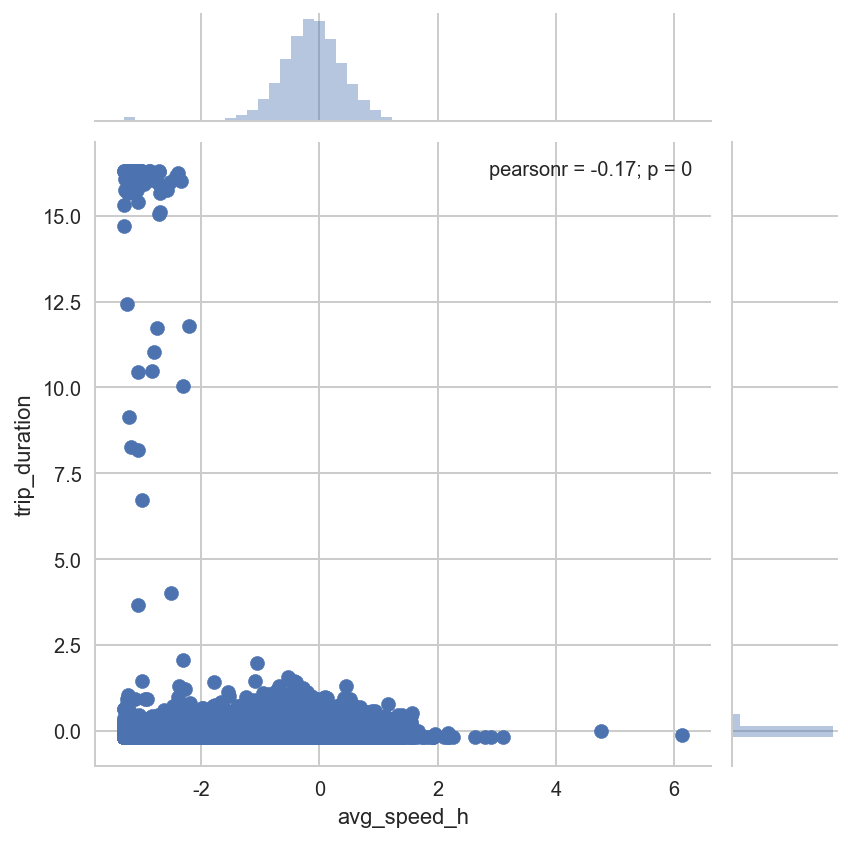

In [117]:
# trip_duration에 로그를 취해보면 아웃라이어가 몰려있음을 확인할 수 있음

plt.figure(figsize=(7, 5))
sns.jointplot(x=np.log1p(train_sp_du_normalized["avg_speed_h"]),
              y="trip_duration", 
              data=train_sp_du_normalized[::10])
plt.show()

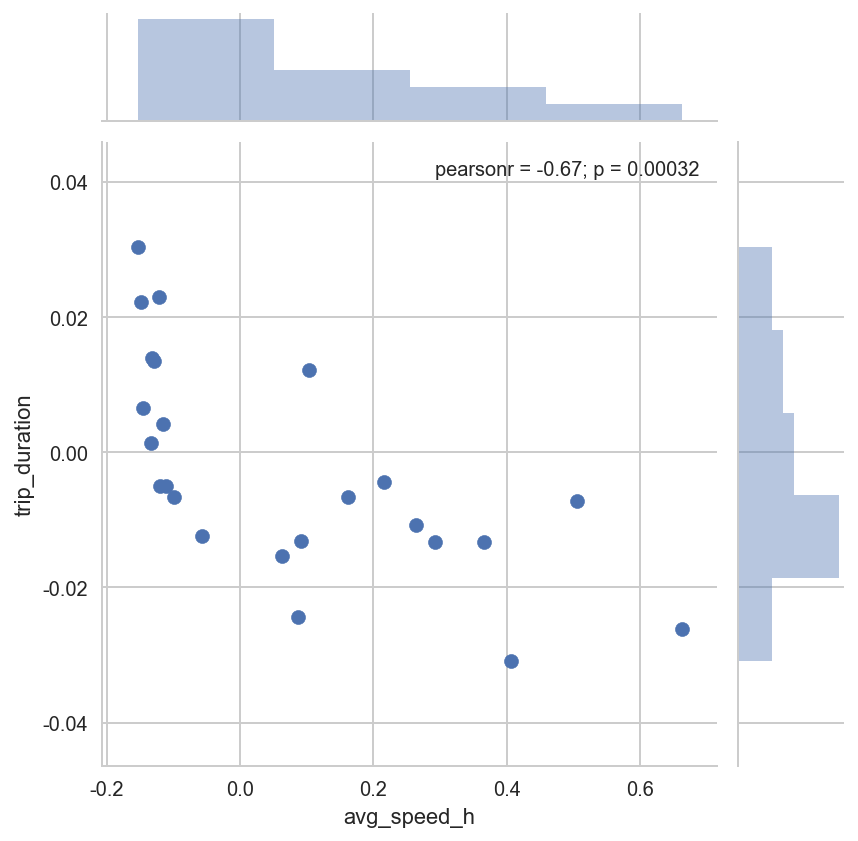

In [110]:
plt.figure(figsize=(7, 5))
sns.jointplot(x="avg_speed_h", y="trip_duration", data=train_sp_du_norm_groupby)
plt.show()